# Early Stopping to prevent Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.callbacks import EarlyStopping

2025-01-18 00:45:04.257399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737141304.270155  263327 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737141304.273719  263327 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 00:45:04.287972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [188]:
X, y = make_circles(n_samples=100, noise=0.1)

X.shape, y.shape

((100, 2), (100,))

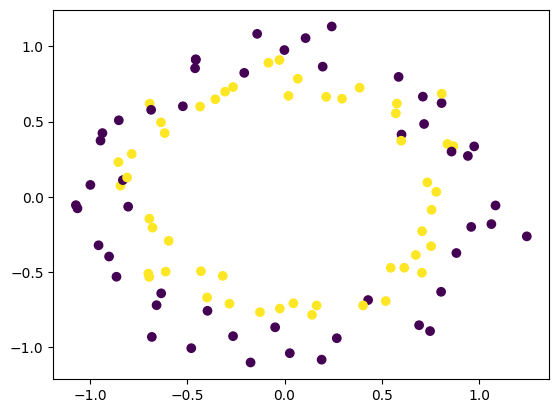

In [189]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, y_train.shape

((75, 2), (75,))

## Without Early Stopping

In [21]:
model = Sequential()

model.add(InputLayer(shape=(2, )))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [23]:
history = model.fit(X_train, y_train, epochs=3000, validation_data=(X_test, y_test), verbose=0)

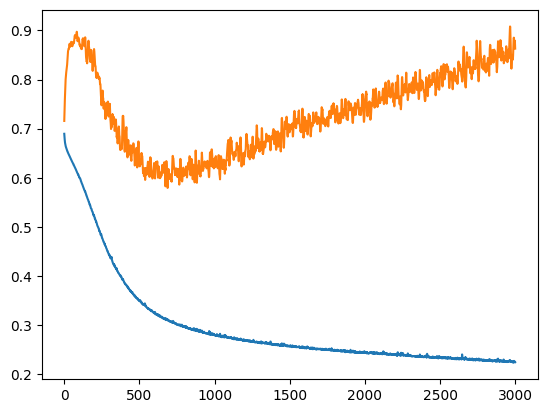

In [24]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

- #### After a certain point we can see that even though training loss is decreasing but validation loss keeps on increasing
- #### This is clearly a sign of overfitting and it worsens the more epochs we run after that point

### Early stopping will automatically detect that point and stop the training

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 827us/step


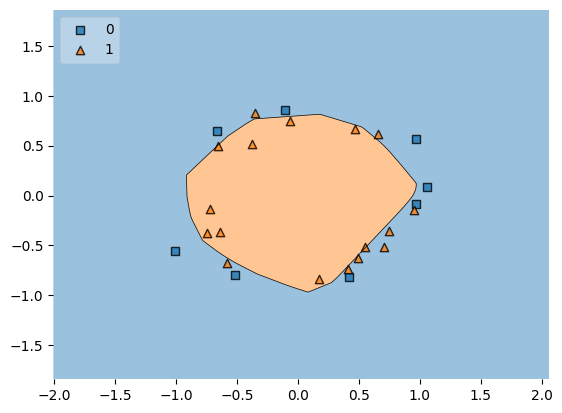

In [187]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## With Early Stopping

In [193]:
# Initialize a EarlyStopping callback class

early_stopping_callback = EarlyStopping(
    monitor="val_loss",    
    # can also be loss, accuracy, val_accuracy, etc. 
    # Since we are checking overfitting we are taking val_loss (or val_accuracy)
    # In other cases such as if we want to stop near convergence we can use loss or accuracy

    min_delta = 0.0001,
    patience = 200,
    verbose=1,
    mode="auto",
    restore_best_weights=True
) 

In [194]:
model = Sequential()

model.add(InputLayer(shape=(2, )))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [195]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [196]:
history_callback = model.fit(X_train, y_train, epochs=3000, validation_data=(X_test, y_test), callbacks=early_stopping_callback)

Epoch 1/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5456 - loss: 0.6946 - val_accuracy: 0.3600 - val_loss: 0.7046
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5769 - loss: 0.6904 - val_accuracy: 0.3600 - val_loss: 0.7088
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5367 - loss: 0.6922 - val_accuracy: 0.3600 - val_loss: 0.7119
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5863 - loss: 0.6878 - val_accuracy: 0.3600 - val_loss: 0.7157
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5835 - loss: 0.6864 - val_accuracy: 0.3600 - val_loss: 0.7169
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6058 - loss: 0.6864 - val_accuracy: 0.3600 - val_loss: 0.7186
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5668 - loss: 0.6891 - val_accuracy: 0.4000 - val_loss: 0.7200
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5824 - loss: 0.6882 - val_accuracy: 0.4400 - 

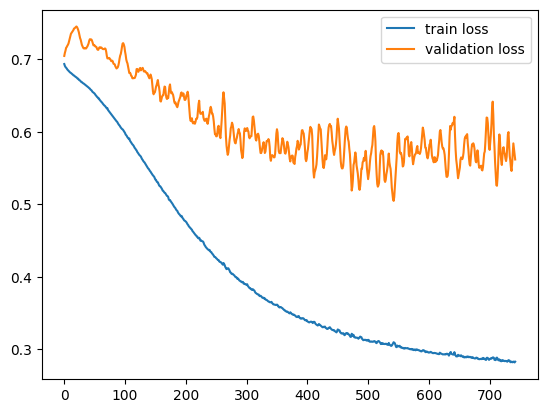

In [197]:
plt.plot(history_callback.history["loss"], label="train loss")
plt.plot(history_callback.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

- #### Now we can see that the model stops training as soon as it sees that no more improvement is being made in val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 825us/step


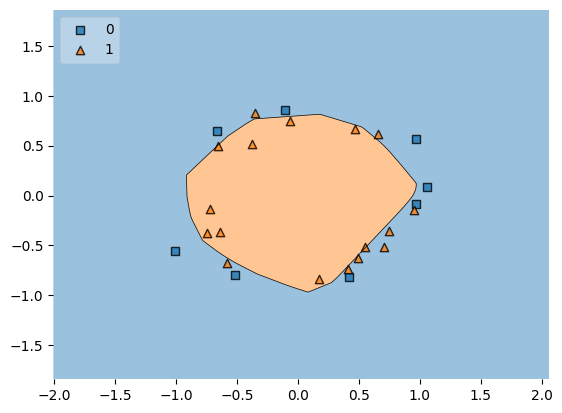

In [174]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()